# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('diabetes_data_upload.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

This data set has 16 attributes and 520 data points with __no missing values__.

# EDA

## Number of Positive and Negative cases

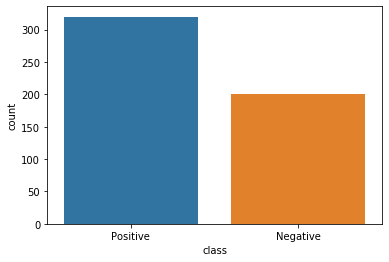

In [4]:
sns.countplot(data=df,x='class')

## 2. Distribution of data for each attribute

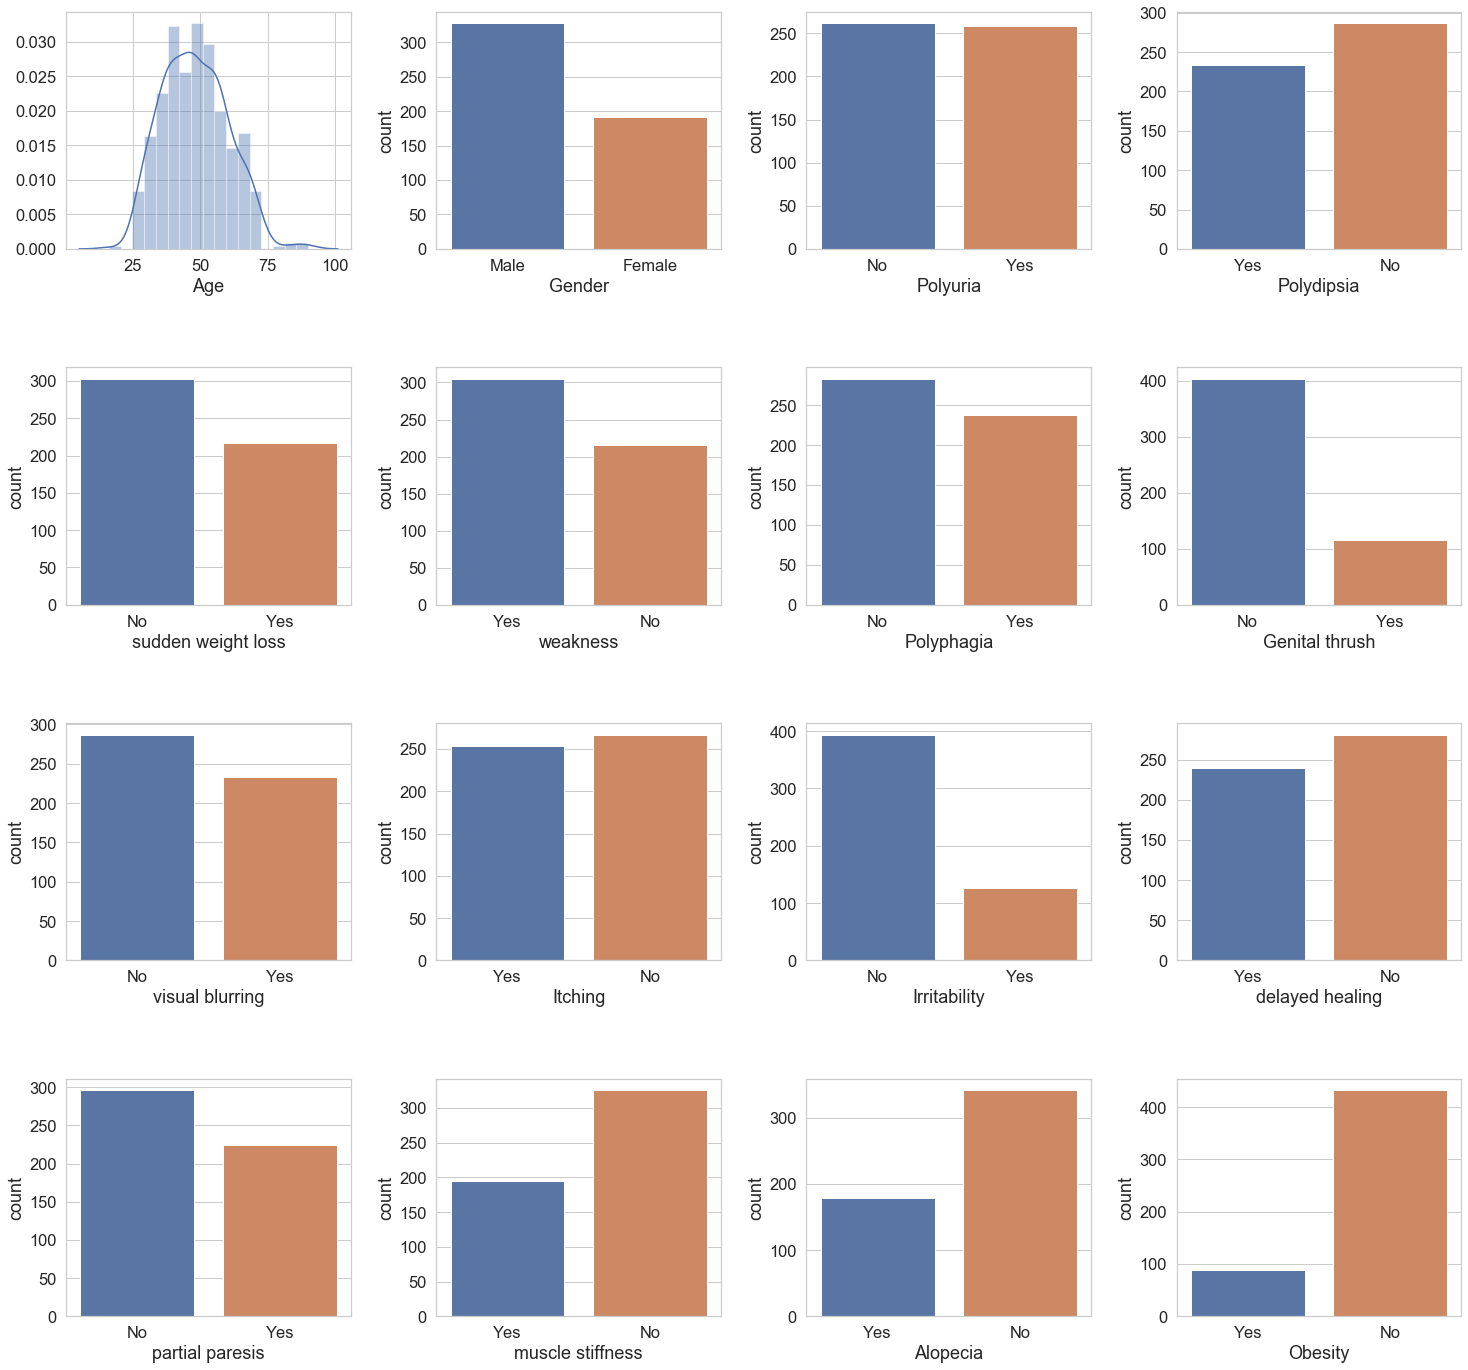

In [13]:
columns = df.columns

sns.set(font_scale=1.5,style='whitegrid')
fig = plt.figure(figsize=(25,24)) #(width,height)
fig.tight_layout(h_pad=1, w_pad=2)

nrows, ncols = 4,4
for i in range(1,17):
    ax = fig.add_subplot(nrows, ncols, i)
    
    if i == 1: # for attribute 'Age', we use displot
        sns.distplot(df[columns[i-1]])
    
    else:
        sns.countplot(data=df, ax=ax, x=columns[i-1])

    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.5)
plt.savefig('EDA-distribution.png')
plt.show()

## 3. Distribution of data for each attribute, with respect to "class" attribute (positive/negative)

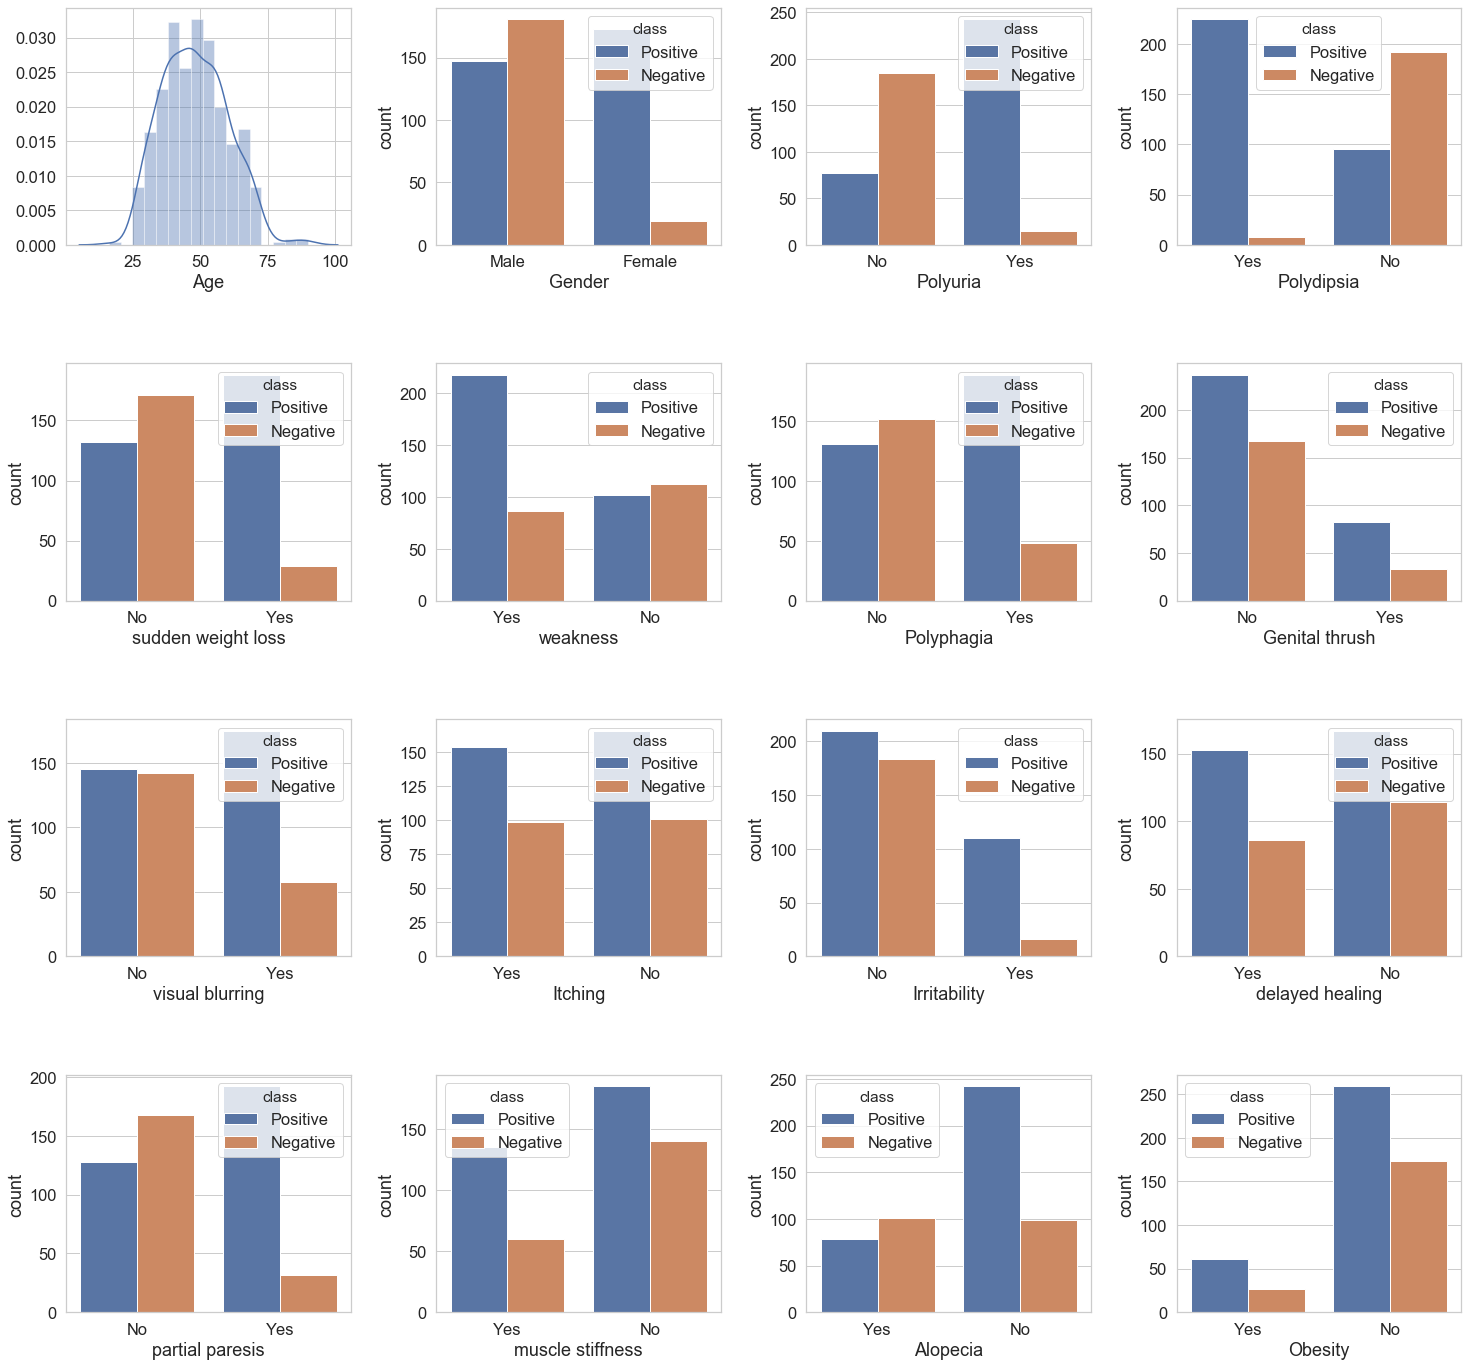

<Figure size 432x288 with 0 Axes>

In [14]:
columns = df.columns

sns.set(font_scale=1.5,style='whitegrid')
fig = plt.figure(figsize=(25,24)) #(width,height)
fig.tight_layout(h_pad=1, w_pad=2)

nrows, ncols = 4,4
for i in range(1,17):
    ax = fig.add_subplot(nrows, ncols, i)
    
    if i == 1: # for attribute 'Age', we use displot
        sns.distplot(df[columns[i-1]])
    
    else:
        sns.countplot(data=df, ax=ax, x=columns[i-1], hue='class')

    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.5)
plt.show()
plt.savefig('EDA-distribution-hue.png')

## 4. Number of Cases for Different Age Intervals

In [8]:
# create age bins (interval)
df['age_interval'] = pd.cut(x=df['Age'], bins=[0,9,19, 29, 39, 49,59,69,79,89,99],labels=['0-9','9-19','20s', '30s', '40s','50s','60s','70s','80s','90s'])
df.head(3)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,age_interval
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,40s
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,50s
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,40s


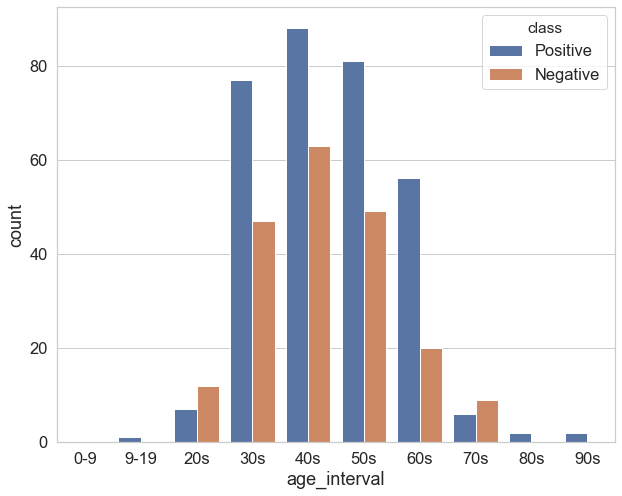

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='age_interval',hue='class')
plt.show()
plt.savefig('EDA-age-diabetes.png')